
# MEGM1 - UE5
---
## **Session 7: tutorial on statistics for omics data**
*Claire Vandiedonck*

*Contenu de ce tutorial:*

Nous reprenons ici l'exercice 5 facultatif de la session R5 que nous poursuivons pour étudier: 
1. l'impact de la différence entre les moyennes et de la variance dans un test statistique de comparaison de moyennes
2. les effets des tests multiples sur les taux de faux positifs


## 0. Before going further
---

Check your your working directory, and sit it to another path if needed:

In [1]:
getwd()

[1] "/srv/home/cvandiedonck/megm1_ue5_r/R7"

In [2]:
#setwd('/srv/home/cvandiedonck/megm1_ue5_r/R7') #change with your login!!!
#getwd() #change is visible

## I. Test statistique de comparaison de moyennes: impact de la différence entre les moyennes et de la variance
---

### I.A. Deux populations avec une moyenne différente mais une même variance 

Nous allons d'abord tirer deux échantillons de deux populations présentant des moyennes différentes et une même variance.

A titre d'exemple dans ce parctical nous prendrons la "taille des humains debout" comme trait d'intérêt.
En France en 2001, les données de l'INSEE indiquaient une taille moyenne de 1.62 pour les femmes et de 1.74 m pour les hommes. Dans l'ensemble de la population, l'écacrt-type était d'environ 7 cm.

- Générez 2 échantillons `sample1` et `sample2` de taille 100 issus de la population de femmes et de la population d'hommes avec les paramètres indiqués en supposant que la densité de probabilité de la taille suit une loi normale.

*__Tip:__ utiliser la fonction `rnorm()`*

In [3]:
sample1 <- rnorm(n=100, mean=162, sd=7)

In [4]:
sample2 <- rnorm(n=100, mean=174, sd=7)

- Regardez les valeurs résumées des distributions obersvées et faites un simple boxplot de ces distributions.

*__Tip:__ utiliser les fonctions `summary()` et `boxplot`*

In [5]:
summary(sample1)
summary(sample2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  142.5   157.0   162.2   161.3   165.8   175.5 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  154.9   169.1   173.1   173.7   179.0   196.7 

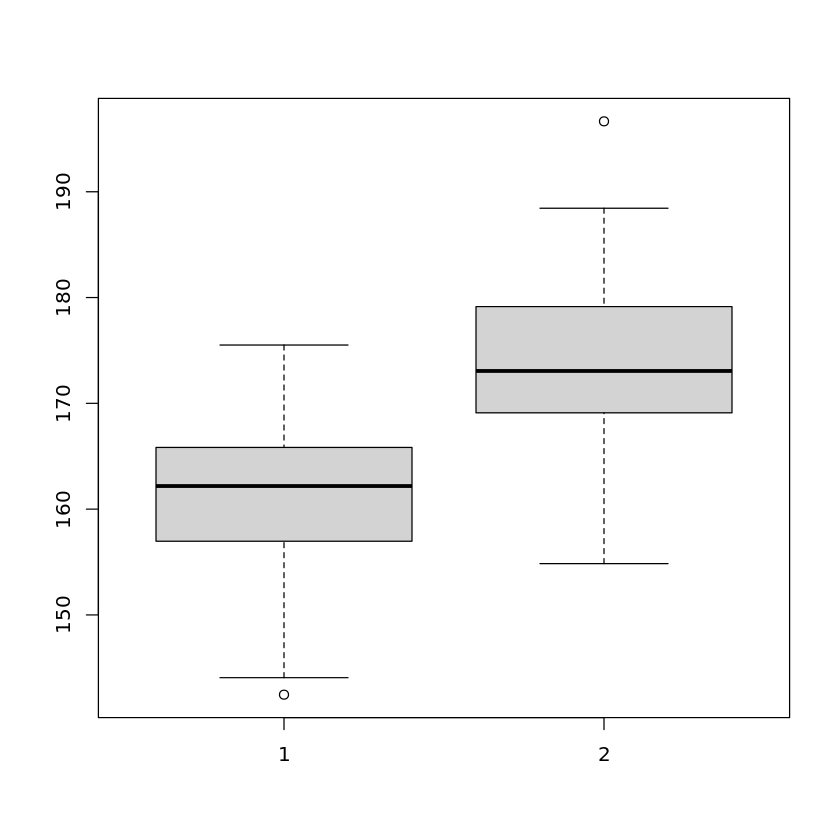

In [6]:
boxplot(sample1, sample2)

- Testez la différence des moyennes entre les deux populations d'où sont issus ces échantillons avec un test de Student bilatéral

*__Tip:__ utiliser la fonction `t.test()`*

In [7]:
t.test(sample1, sample2, alternative = "two.sided")


	Welch Two Sample t-test

data:  sample1 and sample2
t = -12.431, df = 194.85, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14.38928 -10.44874
sample estimates:
mean of x mean of y 
 161.3186  173.7376 


- Quelle est la valeur de la p-value?

*__Tip:__ utilisez la fonction `str()` pour voir comment extraire cette pvalue du test*

In [8]:
str(t.test(sample1, sample2, alternative = "two.sided"))

List of 10
 $ statistic  : Named num -12.4
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 195
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 1.67e-26
 $ conf.int   : num [1:2] -14.4 -10.4
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 161 174
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 0.999
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "sample1 and sample2"
 - attr(*, "class")= chr "htest"


In [9]:
t.test(sample1, sample2, alternative = "two.sided")$p.value

[1] 1.672476e-26

Illustrons à présent cette différence à l'aide du paquet dabestR https://github.com/ACCLAB/dabestr

- Installez le paquet dabestr s'il n'est pas déjà installé et chargez-le dans votre session R.

*__Tip:__ utilisez la fonction `requireNamespace)`, `install.packages()`, `library()` et `sessionInfo()`*

In [10]:
if (!requireNamespace("dabestr"))
  install.packages("dabestr")
library(dabestr)
sessionInfo()

Loading required namespace: dabestr

Loading required package: magrittr



R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dabestr_0.3.0  magrittr_2.0.1

loaded via a namespace (and not attached):
 [1] pillar_1.6.2      compiler_4.0.5    base64enc_0.1-3   tools_4.0.5      
 [5] boot_1.3-28       digest_0.6.27     uuid_0.1-4        jsonlite_1.7.2   
 [9] evaluate_0.14     lifecycle_1.0.0   tibble_3.1.4      gtable_0.3.0     
[13] p

- Consultez la page github de dabestr voire sa vignette et faites une représentation graphique dite ***Gardner-Altman estimation plot*** des distributions qui affiche l'IC de la moyenne en prenant les hommes comme groupe de référence.

Pour cela vous devez d'abord générer un dataframe:

    - Rassemblez les données des deux échantillons dans un dataframe avec deux colonnes `height` et `grp` pour le groupe.

*__Tip:__ utilisez la fonction `data.frame()` sur un vecteur concanténant les taille des deux échantillons avec la fonction `c()` et un vecteur répétant les valeurs 1 et 2 100 fois dans le bon ordre avec la fonction `rep()` et son argument `each=`*

In [11]:
df <- data.frame(height=c(sample1, sample2), grp=rep(c(1,2), each=100))

    - Affichez les premières, dernières lignes du dataframe et sa structure. Comptez également le nombre d'obersvations appartenant au groupe 1 ou 2.

*__Tip:__ utilisez les fonctions `head()` , `tail()`, `str()` et `table()`.*

In [12]:
head(df)

,height,grp
,<dbl>,<dbl>
1,156.4589,1
2,165.7442,1
3,162.0112,1
4,164.4909,1
5,160.5047,1
6,165.0646,1


In [13]:
tail(df)

,height,grp
,<dbl>,<dbl>
195,164.6161,2
196,173.3857,2
197,176.7909,2
198,167.1926,2
199,183.2545,2
200,183.9120,2


In [14]:
str(df)

'data.frame':	200 obs. of  2 variables:
 $ height: num  156 166 162 164 161 ...
 $ grp   : num  1 1 1 1 1 1 1 1 1 1 ...


In [15]:
table(df$grp)


  1   2 
100 100 

    - Faites de Grander-Latman estimation plot:

*__Tip:__ utilisez les fonctions `dabest()` , `unpaired_mean_diff()`, et `plot()`.*

dabestr (Data Analysis with Bootstrap Estimation in R) v0.3.0

Good evening!
The current time is 23:37 PM on Monday November 08, 2021.

Dataset    :  df
X Variable :  grp
Y Variable :  height

Unpaired mean difference of 2 (n = 100) minus 1 (n = 100)
 12.4 [95CI  10.4; 14.4]


5000 bootstrap resamples.
All confidence intervals are bias-corrected and accelerated.


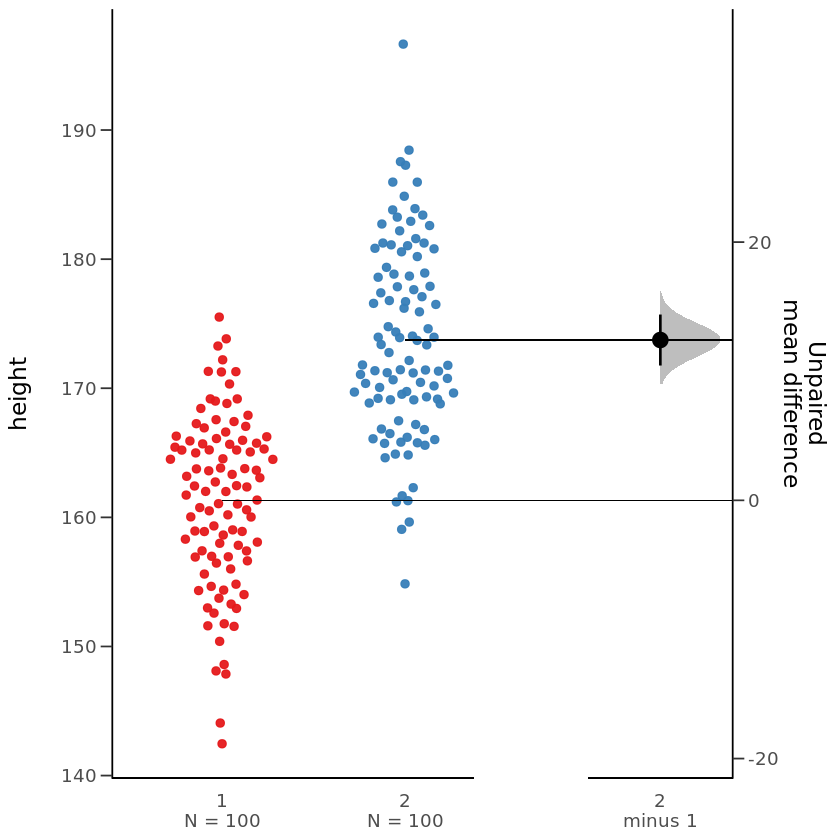

In [16]:
unpaired_mean_diff <- dabest(df, grp, height,
                             idx = c("1", "2"),
                             paired = FALSE) %>% 
                      mean_diff()
unpaired_mean_diff
plot(unpaired_mean_diff)

### I.B. Impact de la taille des échantillons, de la différence des moyennes ou de la variance

Nous allons à présent étudier l'impact de la différence entre les moyennes des populations de départ ou celui de la variance sur la puissance de détecter une différence.

- Pour jouer sur ces différents paramètres, écrivez une fonction qui prend comme argument la taille des échantillons, la moyenne et la variance de chacune des populations, et qui renvoie la statistique t et la pvalue du test de Student.

In [17]:
compute_tv <- function(n1, m1, s1, n2, m2, s2){
    sample1 <- rnorm(n=n1, mean=m1, sd=s1)
    sample2 <- rnorm(n=n2, mean=m2, sd=s2)
    tval <- t.test(sample1, sample2, alternative = "two.sided")$statistic
    pval <- t.test(sample1, sample2, alternative = "two.sided")$p.value
    tv <- list("t"=tval, "p"=pval)
    return(tv)
}

- Faites le tests en prenant à présent les écarts types différents chez les hommes et les femmes qui sont respectivement de 7.1 cm et 6.5 cm dans la population Française en 2001.

In [18]:
compute_tv(100, 162, 6.5, 100, 174, 7.1)

$t
        t 
-11.69383 

$p
[1] 3.261248e-24

- Refaites le test en réduisant les effectifs à 30 pour cahque échantillon.

In [19]:
compute_tv(30, 162, 6.5, 30, 174, 7.1)

$t
        t 
-5.784231 

$p
[1] 3.193486e-07

**=> Comment a varié la significativité?**

Les paramètres de la distribution de la taille des humains varient aussi entre les populations dans le monde.

- Refaites le test avec ces effectifs de 30, en gardant la même différence entre les moyennes mais en augmentant la variance à 25 pour chaque population.

In [20]:
compute_tv(30, 162, 25, 30, 174, 25)

$t
        t 
-1.191958 

$p
[1] 0.2387824

**=> La différence, même importante entre les moyennes des populations, est-elle encore détectable?**

- Refaites le test avec des populations présentant une petite différence entre les moyennes  (3 cm avec par exemple 160 cm pour les femmes et 163 cm pour les hommes) et des variances faibles (3 cm)

In [21]:
compute_tv(30, 160, 3, 30, 163, 3)

$t
        t 
-3.153149 

$p
[1] 0.002576702

**=> Détectez-vous quand même une différence statistiquement significative?**

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
La puissance du test augmente avec:
    
- la taille des échantillons
- la différence entre les moyennes des populations
- une petite variance </div>

## II. Effet des tests multiples sur le taux de faux positifs
---

Dans les jeux de données omiques, on effectue autant de tests que de "features".

Nous n'allons pas générer dans ce practical de multiples features mais nous allons prendre notre trait de la taille et tester par simulation l'impact des tests multiples sur les faux positifs.

Nous repartons du dataframe généré ci-dessus.

- Nous allons simuler 10000 échantillons sous une hypothèse nulle où le groupe ne modifie pas les moyennes. Pour ce faire, générez 10000 permutations de Monte-Carlo en tirant au hasard les statuts pour les groupes. Et récupérez les valeurs de tests `tvalues` et `pvalues` .

*__Tip:__ Utilisez la fonction `for()` pour faire répéter votre code 1000 fois. Dans la boucle, générez un vecteur avec les valeurs permutées pour le groupe et effectuez le test pour récupérer les valeurs p et de statsitique* 

In [22]:
tvalues <- c()
pvalues <- c()

for(i in 1:10000){
    perm_df <- df
    perm_df$grp <- sample(perm_df$grp, size=200)
    tval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$statistic
    tvalues <- c(tvalues, tval)
    pval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$p.value
    pvalues <- c(pvalues, pval)
}

- Affichez les valeurs résumées et un histogramme des statistiques t:

In [23]:
summary(tvalues)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.965398 -0.675267  0.002609  0.007052  0.689715  4.319464 

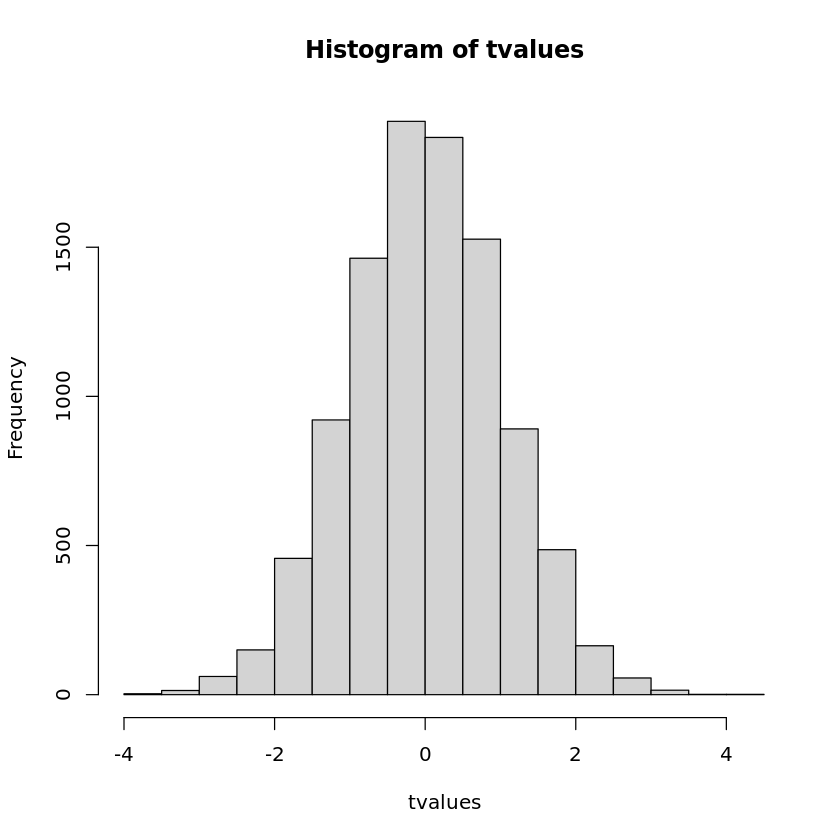

In [24]:
hist(tvalues)

- Combien de valeurs de statsitique sont significatives bien que conformes à H0? 


*__Tip:__ Utilisez la fonction `qnorm()` pour retrouver la valeur seuil d'une loi normale au risque alpha = 5%* 

In [25]:
qnorm(0.025, 0, 1, lower.tail=FALSE)

[1] 1.959964

In [26]:
length(which(abs(tvalues)>=1.96))

[1] 504

**=> Ce résultat était-il attendu?**

- Affichez les valeurs résumées et un histogramme des pvalues:

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000247 0.2427070 0.4962954 0.4963766 0.7475576 0.9999912 

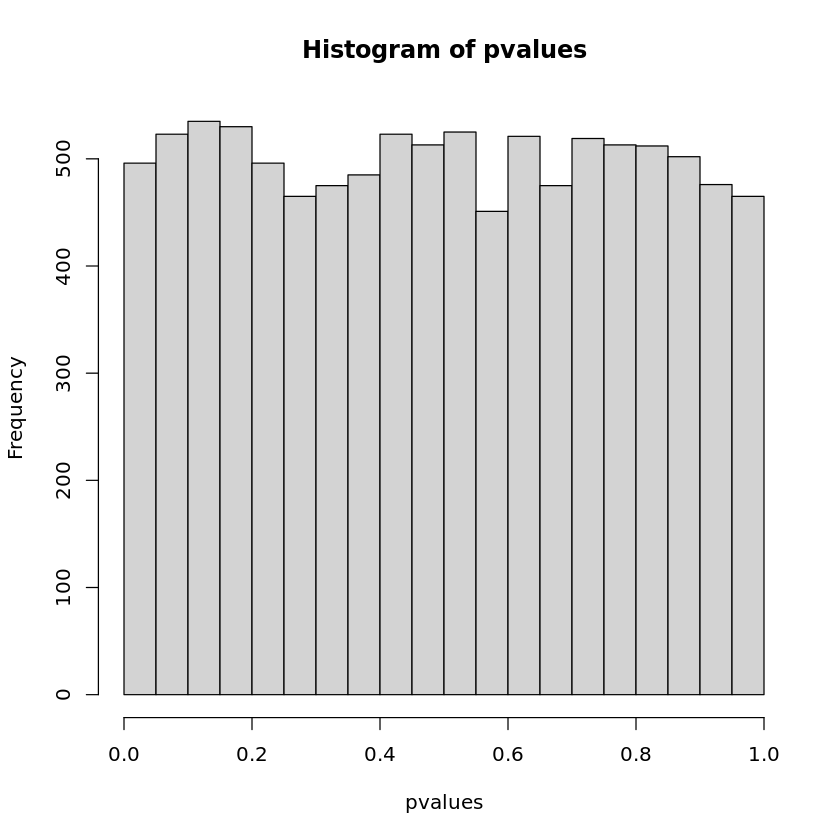

In [27]:
summary(pvalues)
hist(pvalues)

**=> Quelle est la distribution des pvalues sous HO?**

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
Sous HO:
    
- on obtient environ une proportion alpha de valeurs significatives -> si 10000 tests ont été effectués, cela fait envriron 500 différences significatives! Il faut donc corriger pour les tests multiples pour éviter un taux de faux positifs trop élevé.
- la distribution des pvalues est une distribution uniforme entre 0 et 1.</div>

---
---

In [28]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] dabestr_0.3.0  magrittr_2.0.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7         plyr_1.8.6         vipor_0.4.5        RColorBrewer_1.1-2
 [5] pillar_1.6.2       compiler_4.0.5     forcats_0.5.1      base64enc_0.1-3   
 [9] tools_4.0.5        boot_1.3-28        digest_0.6.27      uuid_0.1-4   

---
---

<div class="alert alert-block alert-info"> 
    
<b><em> About jupyter notebooks:</em></b> <br>

- To add a new cell, click on the "+" icon in the toolbar above your notebook <br>
- You can "click and drag" to move a cell up or down <br>
- You choose the type of cell in the toolbar above your notebook: <br>
    - 'Code' to enter command lines to be executed <br>
    - 'Markdown' cells to add text, that can be formatted with some characters <br>
- To execute a 'Code' cell, press SHIFT+ENTER or click on the "play" icon  <br>
- To display a 'Markdown' cell, press SHIFT+ENTER or click on the "play" icon  <br>
- To modify a 'Markdown'cell, double-click on it <br>
<br>    

<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>   
</em>
    
    
</div>   


